In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 60)

In [45]:
df = pd.read_csv('/content/train.csv')
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [46]:
df.shape

(243787, 21)

In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [49]:
df.drop(columns='CustomerID', inplace=True)

In [50]:
df.tail()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,80.367312,47,Sci-Fi,3.697451,1,Male,8,Yes,No,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,59.818441,35,Comedy,1.449742,4,Male,20,No,No,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,176.186095,44,Action,4.012217,6,Male,13,Yes,Yes,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,153.386315,36,Fantasy,2.135789,7,Female,5,No,Yes,0
243786,90,11.593774,1043.439704,Premium,Mailed check,No,Both,No,TV,24.972537,84.824498,11,Action,1.428896,3,Female,1,Yes,No,0


In [51]:
df.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [52]:
df = df.dropna()

In [53]:
df.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [54]:
num_columns = df.select_dtypes(include=['int', 'float']).drop(columns='Churn')
cat_columns = df.select_dtypes(exclude=['int', 'float', 'datetime64[ns]'])

In [55]:
num_columns.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0


In [56]:
num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountAge,243787.0,60.083758,34.285143,1.000000,30.000000,60.000000,90.000000,119.000000
MonthlyCharges,243787.0,12.490695,4.327615,4.990062,8.738543,12.495555,16.238160,19.989957
TotalCharges,243787.0,750.741017,523.073273,4.991154,329.147027,649.878487,1089.317362,2378.723844
ViewingHoursPerWeek,243787.0,20.502179,11.243753,1.000065,10.763953,20.523116,30.219396,39.999723
AverageViewingDuration,243787.0,92.264061,50.505243,5.000547,48.382395,92.249992,135.908048,179.999275
ContentDownloadsPerMonth,243787.0,24.503513,14.421174,0.000000,12.000000,24.000000,37.000000,49.000000
UserRating,243787.0,3.002713,1.155259,1.000007,2.000853,3.002261,4.002157,4.999989
SupportTicketsPerMonth,243787.0,4.504186,2.872548,0.000000,2.000000,4.000000,7.000000,9.000000
WatchlistSize,243787.0,12.018508,7.193034,0.000000,6.000000,12.000000,18.000000,24.000000


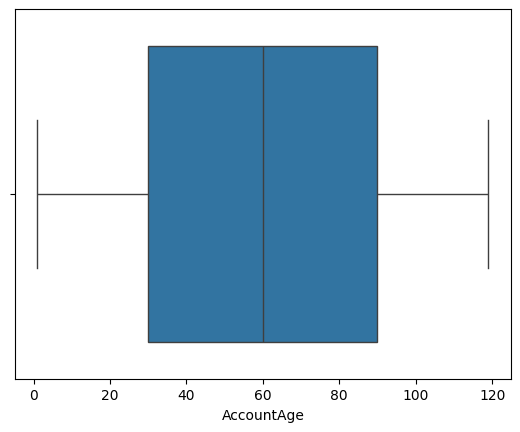

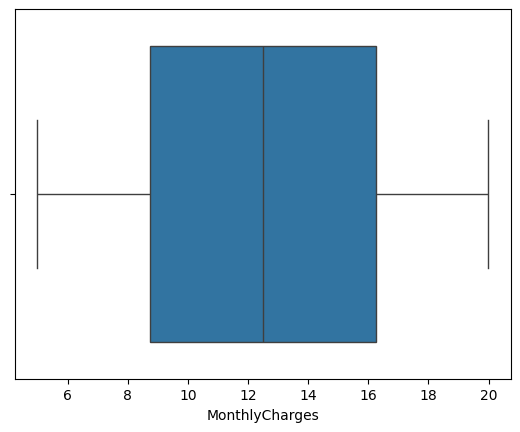

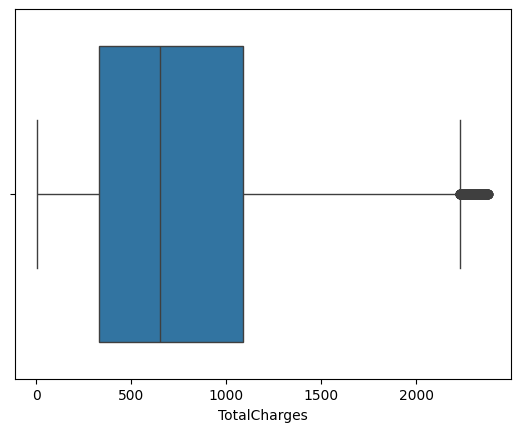

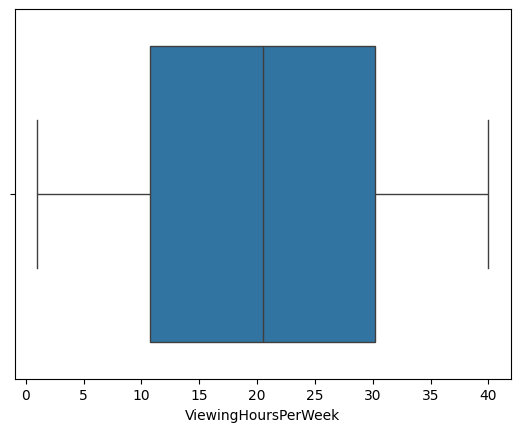

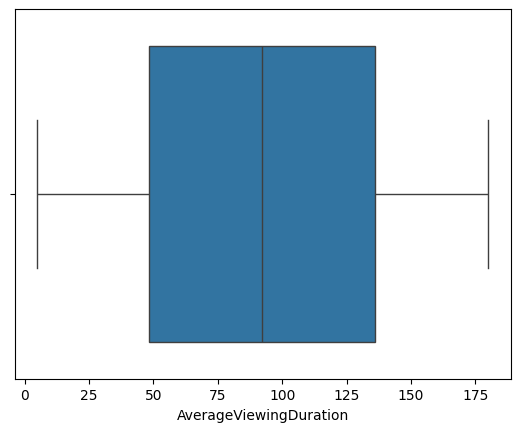

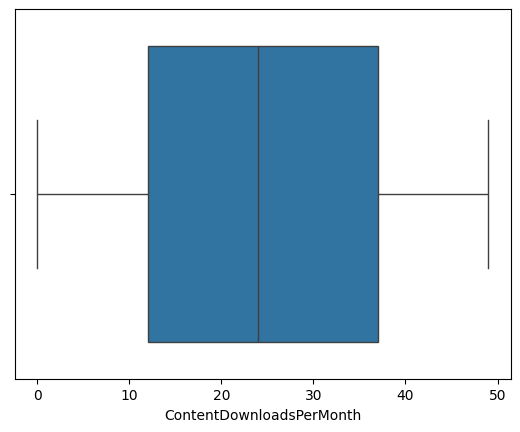

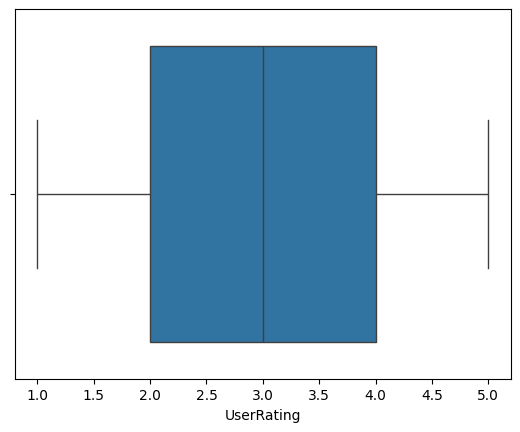

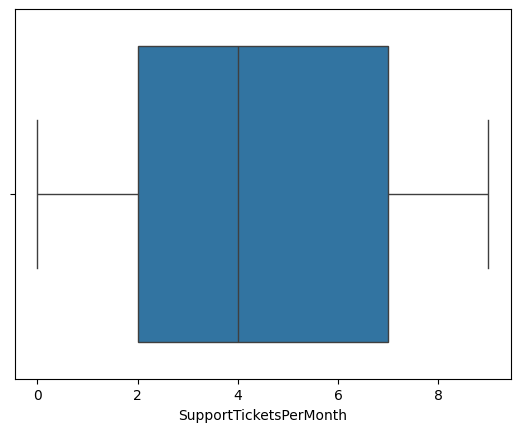

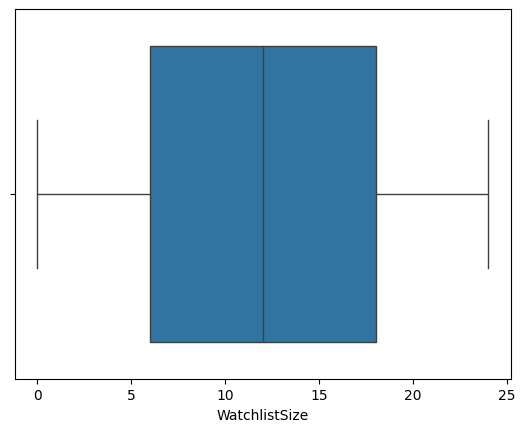

In [57]:
for col in num_columns.columns:
  sns.boxplot(x = col, data = df)
  plt.show()

In [58]:
cat_columns.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,No,No
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,No,Yes
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,Yes,Yes
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,Yes,Yes
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,No,No


In [59]:
for col in cat_columns:
  print(f"value counts for {col}")
  print(df[col].value_counts())
  print()
  print()

value counts for SubscriptionType
SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64


value counts for PaymentMethod
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64


value counts for PaperlessBilling
PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64


value counts for ContentType
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64


value counts for MultiDeviceAccess
MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64


value counts for DeviceRegistered
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64


value counts for GenrePreference
GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64


value counts for Gender
Gender
Female 

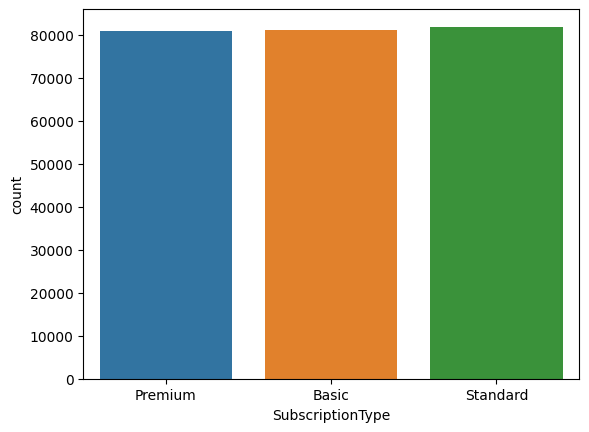

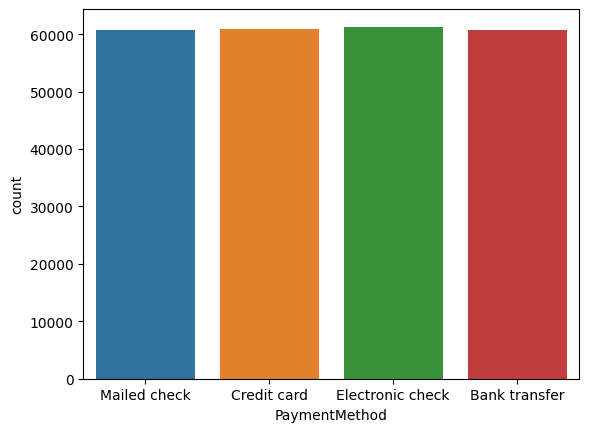

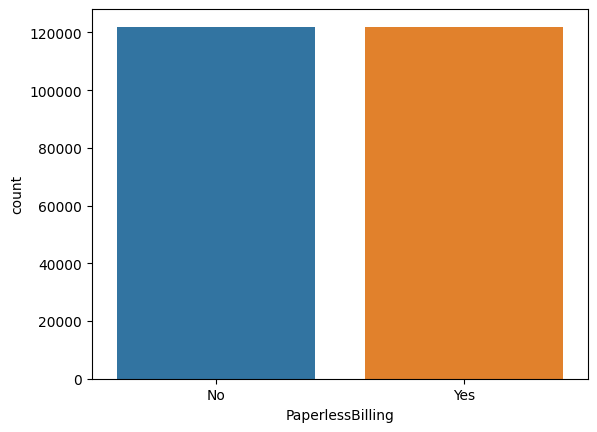

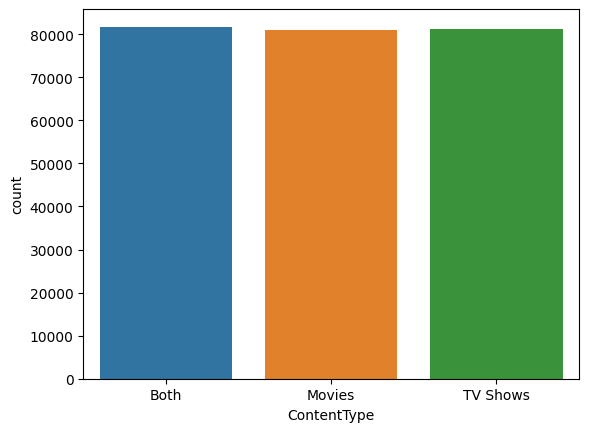

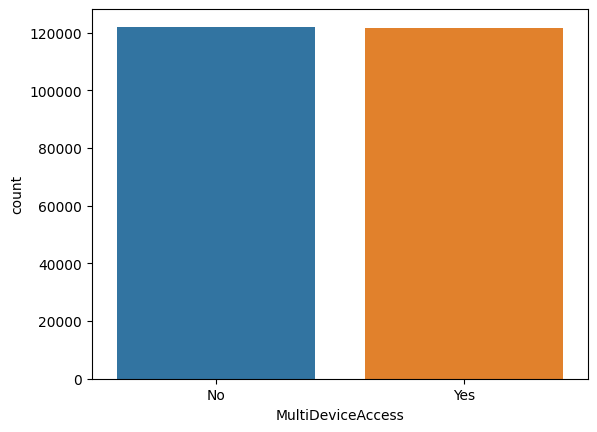

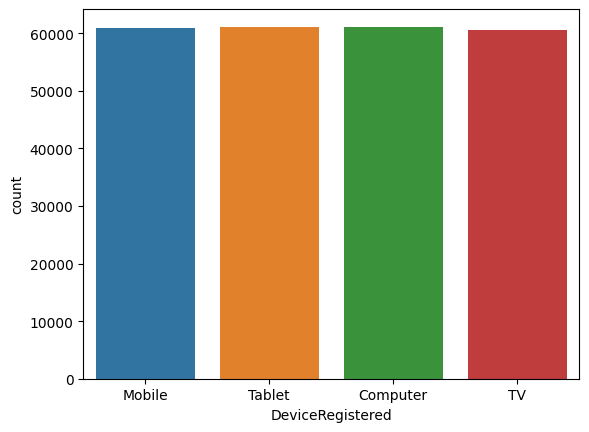

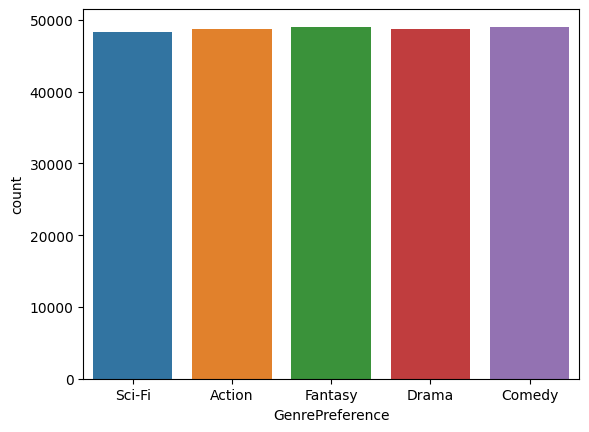

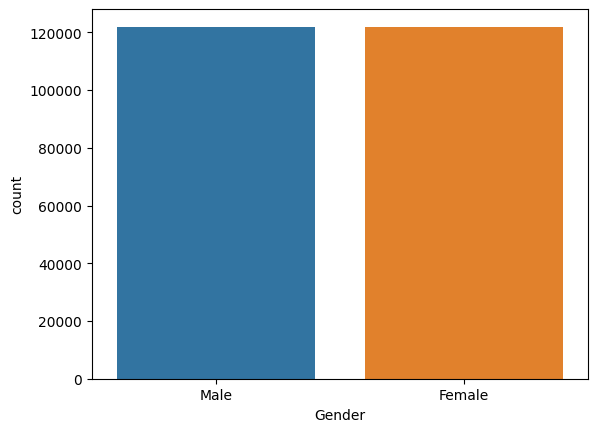

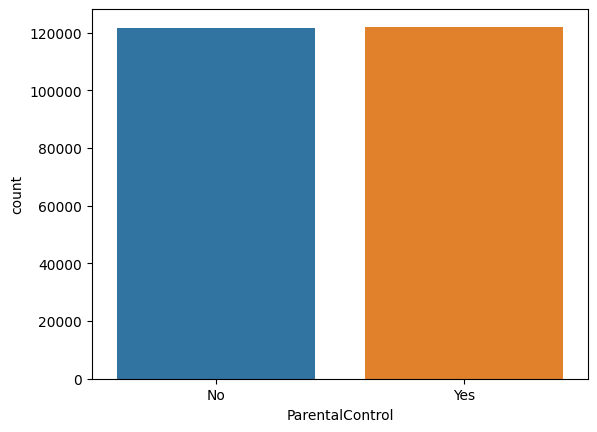

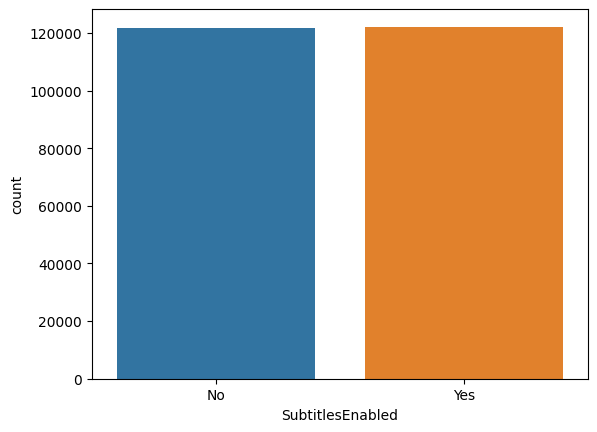

In [60]:
for col in cat_columns:
  sns.countplot(x = col, data = df, hue=col)
  plt.show()

In [61]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.818768
1,0.181232


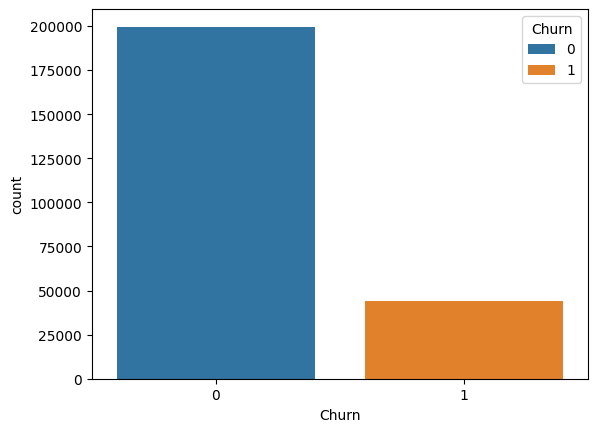

In [62]:
sns.countplot(x = 'Churn', data = df, hue='Churn')
plt.show()

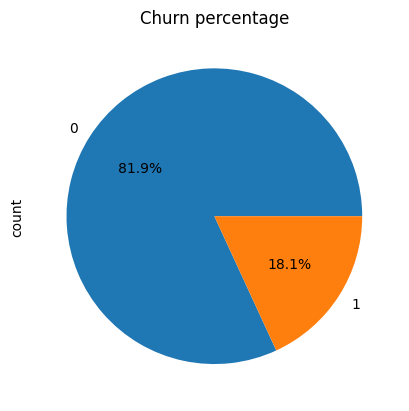

In [63]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn percentage')
plt.show()

In [64]:
df['Churn_cat'] = df['Churn'].map({0.0:'NO', 1.0:'YES'})

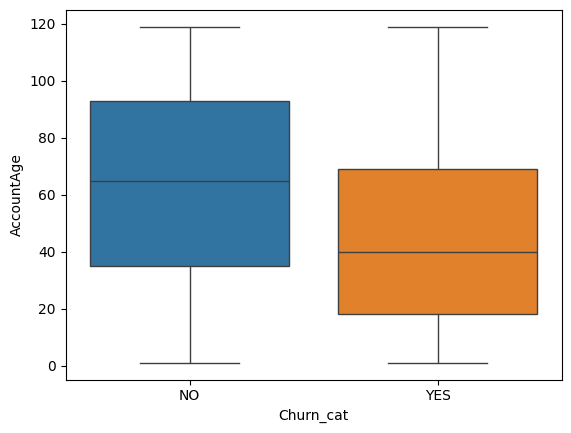

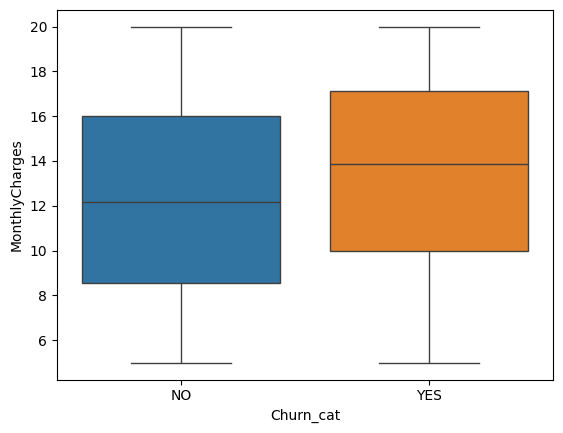

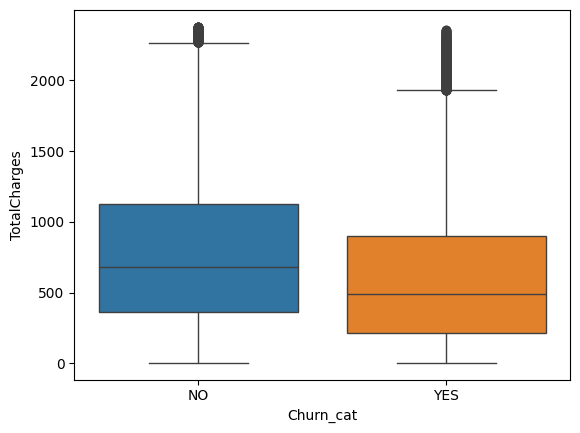

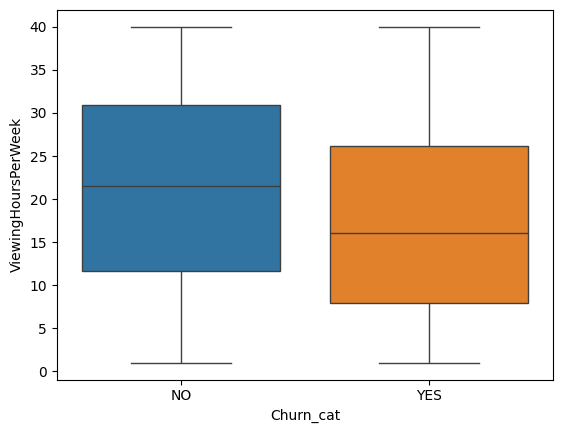

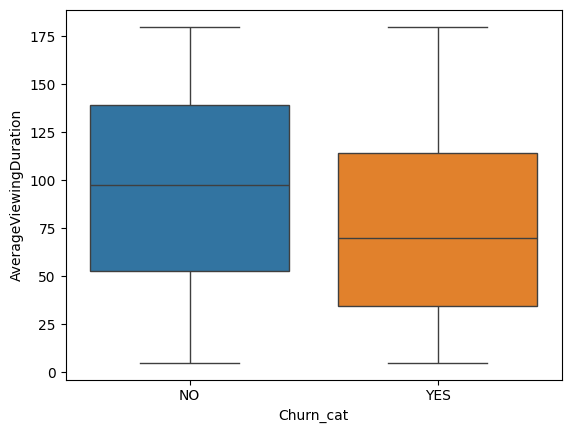

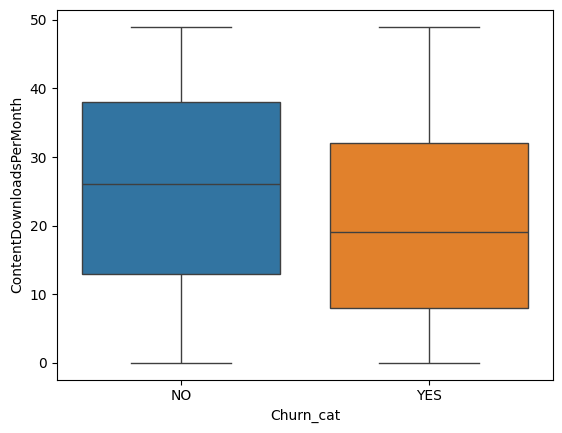

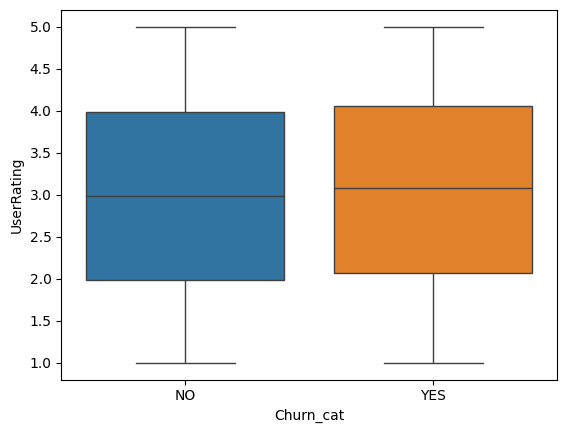

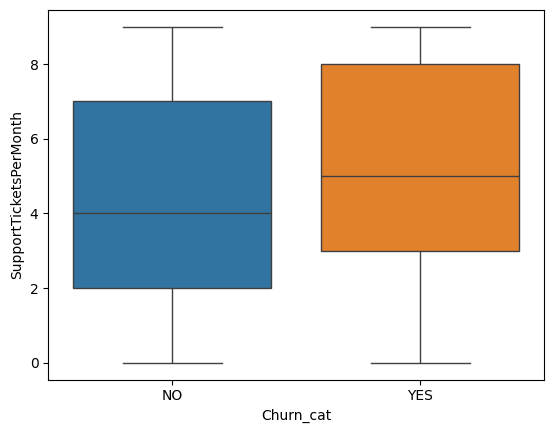

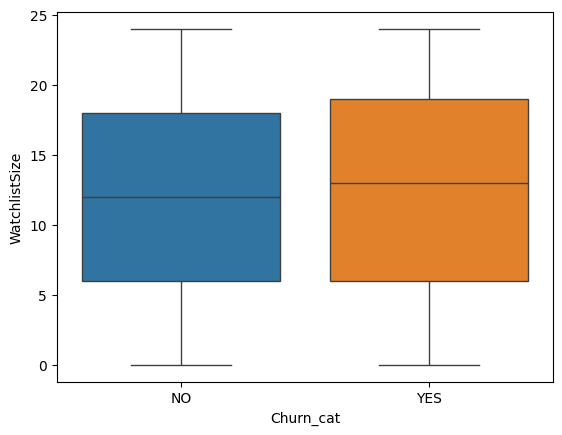

In [65]:
for col in num_columns.columns:
  sns.boxplot(x = 'Churn_cat', y=col, data = df, hue='Churn_cat')
  plt.show()

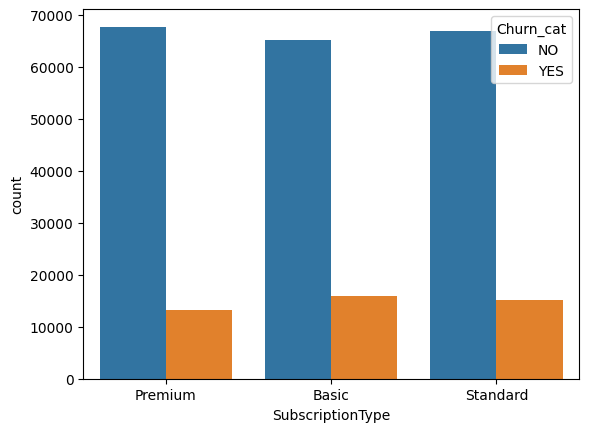

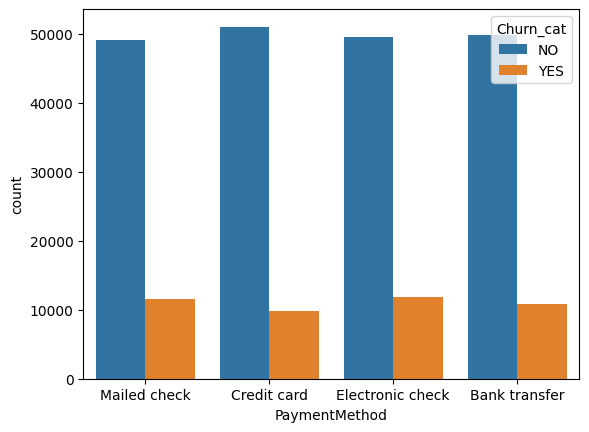

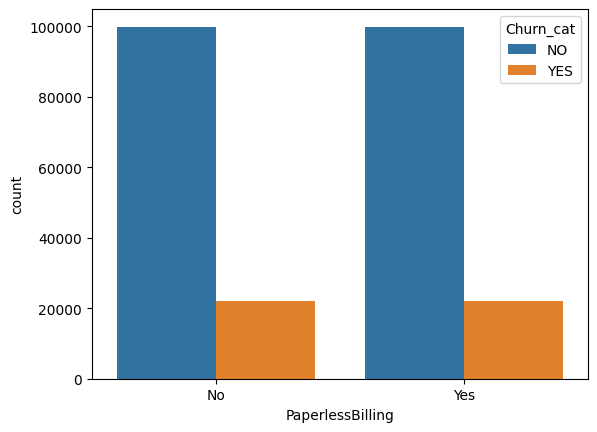

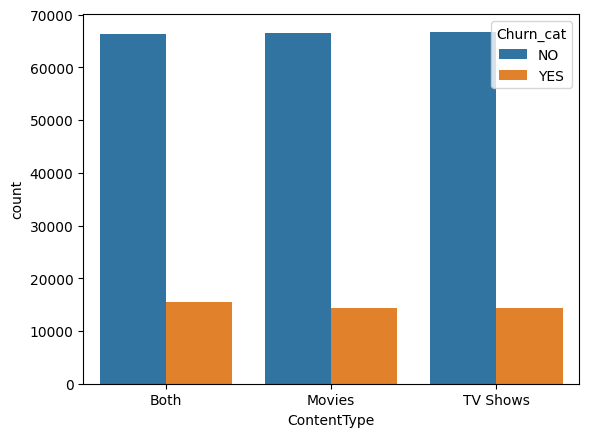

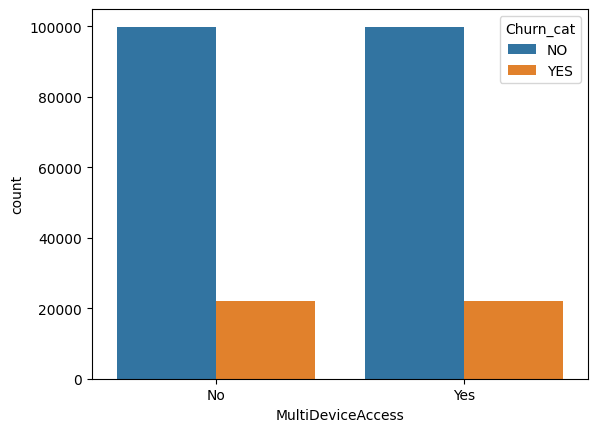

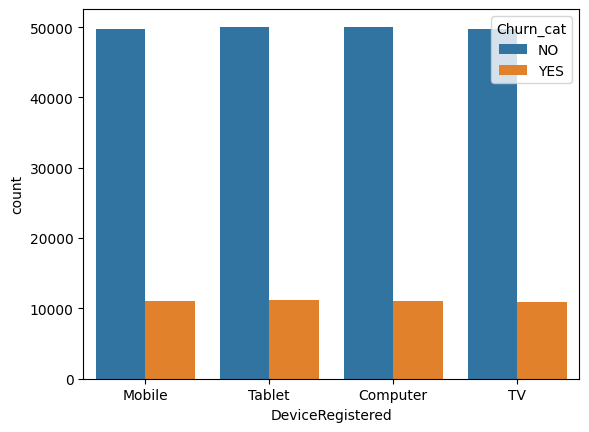

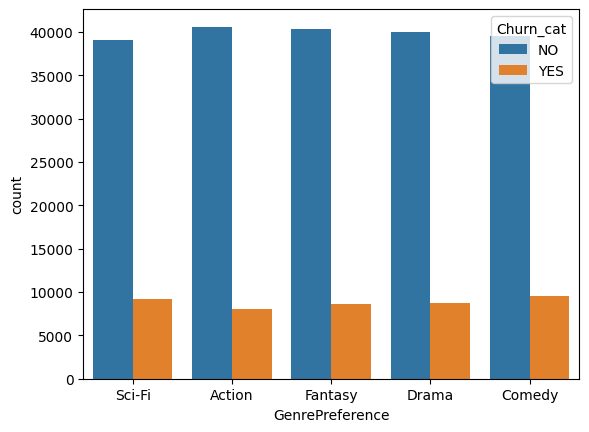

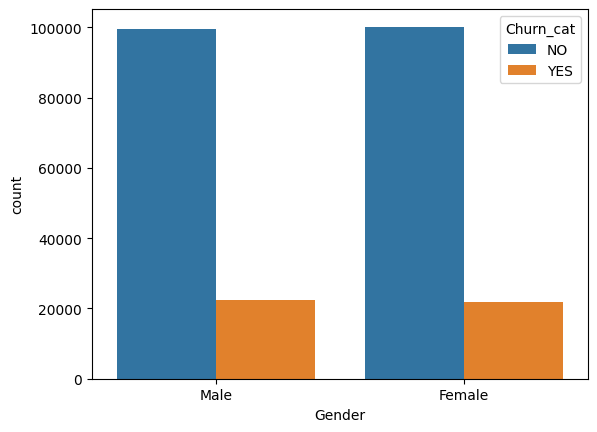

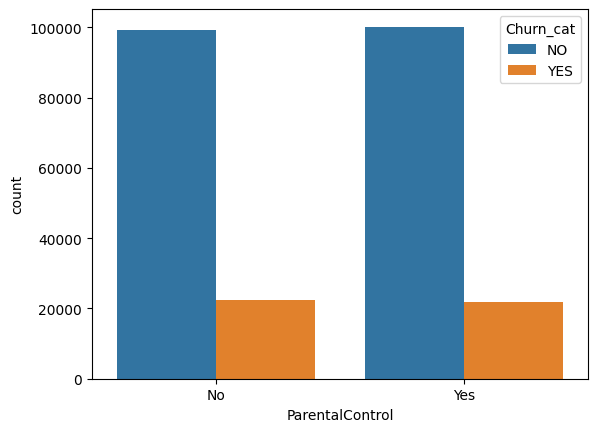

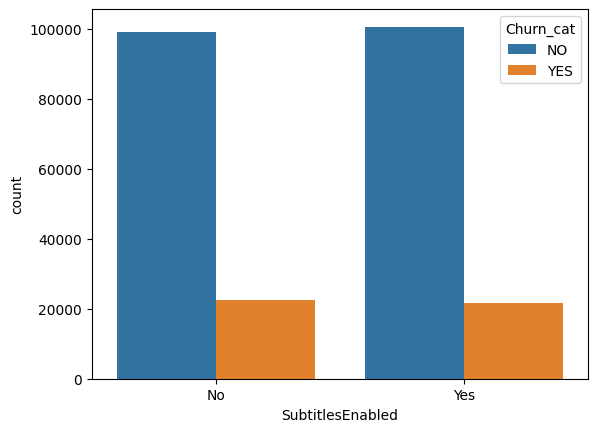

In [66]:
for col in cat_columns.columns:
  sns.countplot(x = col, hue = 'Churn_cat', data = df)
  plt.show()

In [67]:
from scipy.stats import ttest_ind



for col in num_columns:

  t_statistic, p_value = ttest_ind(df[col][df['Churn'] == 0], df[col][df['Churn'] == 1])

  if p_value < 0.05:
    print(f'There is significant association between Churn and {col}')
  else:
    print(f"There is no significant association between Churn and {col}")

  print()
  print()

There is significant association between Churn and AccountAge


There is significant association between Churn and MonthlyCharges


There is significant association between Churn and TotalCharges


There is significant association between Churn and ViewingHoursPerWeek


There is significant association between Churn and AverageViewingDuration


There is significant association between Churn and ContentDownloadsPerMonth


There is significant association between Churn and UserRating


There is significant association between Churn and SupportTicketsPerMonth


There is significant association between Churn and WatchlistSize




In [68]:
from scipy.stats import chi2_contingency


for col in cat_columns:

  table = pd.crosstab(df[col], df['Churn_cat'])

  chi2, p_value, dof, expected = chi2_contingency(table)

  if p_value < 0.05:
    print(f"There is significant association between Churn and {col}")
  else:
    print(f"There is no significant association between Churn and {col}")
  print()
  print()


There is significant association between Churn and SubscriptionType


There is significant association between Churn and PaymentMethod


There is no significant association between Churn and PaperlessBilling


There is significant association between Churn and ContentType


There is no significant association between Churn and MultiDeviceAccess


There is no significant association between Churn and DeviceRegistered


There is significant association between Churn and GenrePreference


There is significant association between Churn and Gender


There is significant association between Churn and ParentalControl


There is significant association between Churn and SubtitlesEnabled




In [69]:
catcols_drop = ['PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
                'DeviceRegistered', 'ParentalControl', 'SubtitlesEnabled']

df.drop(columns=catcols_drop, inplace=True, axis=1)

In [70]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,Churn,Churn_cat
0,20,11.055215,221.104302,Premium,Mailed check,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,0,NO
1,57,5.175208,294.986882,Basic,Credit card,32.450568,25.725595,18,Action,3.478632,8,Male,23,0,NO
2,73,12.106657,883.785952,Basic,Mailed check,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,0,NO
3,32,7.263743,232.439774,Basic,Electronic check,27.960389,131.537507,30,Drama,4.276013,2,Male,24,0,NO
4,57,16.953078,966.325422,Premium,Electronic check,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,0,NO


In [71]:
df = pd.get_dummies(df, columns=['SubscriptionType', 'PaymentMethod', 'GenrePreference', 'Gender'], dtype=int)
df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,Churn_cat,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,NO,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,NO,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,NO,1,0,0,0,0,0,1,0,0,0,1,0,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,NO,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,NO,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [72]:
df.drop(columns='Churn_cat', inplace=True)

In [73]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [74]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [76]:
X.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'SubscriptionType_Basic',
       'SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'GenrePreference_Action', 'GenrePreference_Comedy',
       'GenrePreference_Drama', 'GenrePreference_Fantasy',
       'GenrePreference_Sci-Fi', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [77]:
numerical_data = X_train[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(numerical_data)

In [78]:
scaled_df = pd.DataFrame(scaled_data, columns = numerical_data.columns, index=X_train.index)
scaled_df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
151189,1.166269,-1.043498,0.090846,-0.737769,1.661739,-1.627628,1.327279,-1.570012,0.414165
229180,0.466655,1.025868,1.025452,-0.178975,0.775303,0.659111,1.403991,-0.176016,-1.254608
109880,0.466655,0.925841,0.962600,0.137943,-1.460807,-0.172431,0.624169,-0.176016,-0.976479
27400,-0.466164,1.556289,0.183358,-1.046710,0.241184,1.074881,-0.461105,1.217979,-1.532737
104648,-1.369831,0.043760,-1.117860,0.234298,1.273654,1.005586,1.379889,0.520981,1.109488


In [79]:
X_train.drop(columns = scaled_df.columns, inplace=True)

In [80]:
X_train = pd.concat([scaled_df, X_train], axis=1)
X_train.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male
151189,1.166269,-1.043498,0.090846,-0.737769,1.661739,-1.627628,1.327279,-1.570012,0.414165,0,0,1,1,0,0,0,0,1,0,0,0,1,0
229180,0.466655,1.025868,1.025452,-0.178975,0.775303,0.659111,1.403991,-0.176016,-1.254608,0,1,0,0,0,1,0,0,1,0,0,0,1,0
109880,0.466655,0.925841,0.962600,0.137943,-1.460807,-0.172431,0.624169,-0.176016,-0.976479,1,0,0,0,1,0,0,1,0,0,0,0,1,0
27400,-0.466164,1.556289,0.183358,-1.046710,0.241184,1.074881,-0.461105,1.217979,-1.532737,1,0,0,1,0,0,0,0,0,0,1,0,0,1
104648,-1.369831,0.043760,-1.117860,0.234298,1.273654,1.005586,1.379889,0.520981,1.109488,0,1,0,1,0,0,0,0,0,0,1,0,0,1


In [81]:
numerical_data = X_test[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize']]

test_scaled_data = scaler.transform(numerical_data)

In [82]:
test_scaled_df = pd.DataFrame(test_scaled_data, columns = numerical_data.columns, index=X_test.index)
test_scaled_df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
226816,1.661828,-1.468051,-0.060816,1.371110,-0.852946,-1.558333,0.387680,1.217979,-1.671801
94244,-1.165777,0.218976,-0.919308,1.367621,0.310329,0.936291,1.708095,-1.570012,1.387616
31042,0.524956,0.864045,0.985786,1.323266,-0.423591,0.589816,-0.646603,0.172483,-0.976479
104883,1.224570,-1.462947,-0.232406,0.204652,-1.068072,0.174045,-1.578172,1.566478,-0.976479
85847,-1.486434,-1.543963,-1.332903,-1.026288,1.310548,0.797701,0.906788,-1.570012,-0.420221


In [83]:
X_test.drop(columns = test_scaled_df.columns, inplace=True)

In [84]:
X_test = pd.concat([test_scaled_df, X_test], axis=1)
X_test.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,GenrePreference_Action,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male
226816,1.661828,-1.468051,-0.060816,1.371110,-0.852946,-1.558333,0.387680,1.217979,-1.671801,0,0,1,0,1,0,0,0,0,0,0,1,0,1
94244,-1.165777,0.218976,-0.919308,1.367621,0.310329,0.936291,1.708095,-1.570012,1.387616,1,0,0,0,0,0,1,0,0,1,0,0,1,0
31042,0.524956,0.864045,0.985786,1.323266,-0.423591,0.589816,-0.646603,0.172483,-0.976479,0,0,1,0,0,0,1,0,0,0,1,0,1,0
104883,1.224570,-1.462947,-0.232406,0.204652,-1.068072,0.174045,-1.578172,1.566478,-0.976479,0,0,1,0,1,0,0,1,0,0,0,0,1,0
85847,-1.486434,-1.543963,-1.332903,-1.026288,1.310548,0.797701,0.906788,-1.570012,-0.420221,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state = 42)
ab_model = AdaBoostClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state = 42)

def build_evaluate_models(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'macro')
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

build_evaluate_models(X_train, X_test, y_train, y_test)

Logistic Regression Metrics:
Accuracy: 0.7609398329696293
Precision: 0.6336663837247422
Recall: 0.6672807324172694
F1 Score: 0.6444955267033029
Confusion Matrix:
[[40629  9272]
 [ 5298  5748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     49901
           1       0.38      0.52      0.44     11046

    accuracy                           0.76     60947
   macro avg       0.63      0.67      0.64     60947
weighted avg       0.79      0.76      0.77     60947



Decision Tree Metrics:
Accuracy: 0.7047270579355833
Precision: 0.552640127917876
Recall: 0.5645061668963138
F1 Score: 0.5551746682795592
Confusion Matrix:
[[39145 10756]
 [ 7240  3806]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     49901
           1       0.26      0.34      0.30     11046

    accuracy                           0.70     60947
   macro avg       0.55     

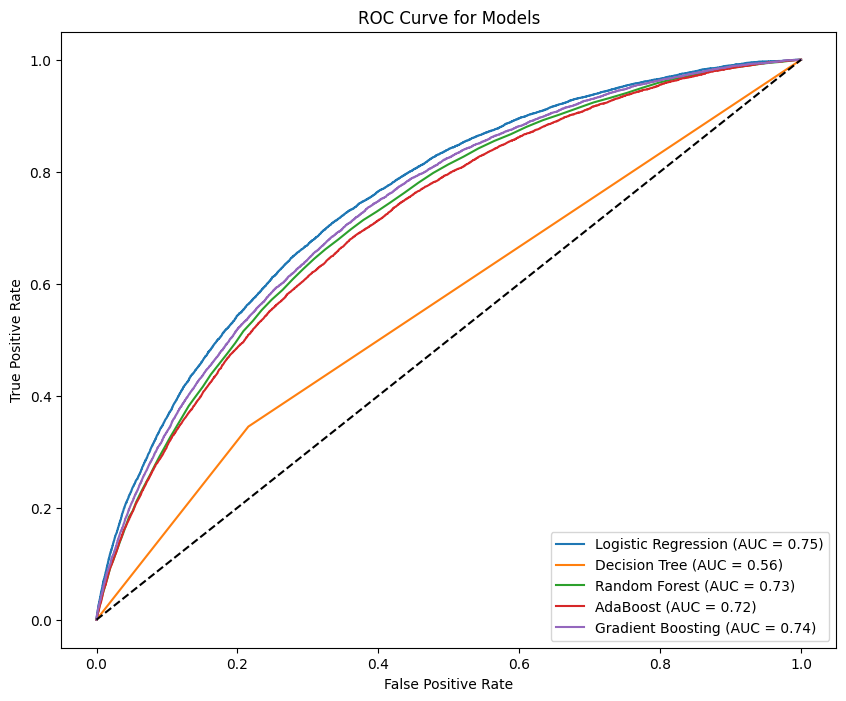

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score


def build_models_roc_curve(x_train, x_test, y_train, y_test):
  models = [lg_model, dt_model, rf_model, ab_model, gb_model]
  model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
  plt.figure(figsize=(10, 8))
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label = f'{name} (AUC = {auc_score:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("ROC Curve for Models")
  plt.legend(loc = 'lower right')
  plt.show()

build_models_roc_curve(X_train, X_test, y_train, y_test)
